## Anomaly Detection Project
### Murphy and Applegate, Florence Cohort, 2021_07_22
#### First Draft Final Notebook

In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

from env import host, user, password
import acquire
import prepare
import explore

## Project Planning

## Executive Summary

## Data Acquisition

In [2]:
# Bring the data in
df = acquire.get_cohort_curr_data()

In [3]:
# What does it look like?
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847330 entries, 0 to 847329
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        847330 non-null  object 
 1   time        847330 non-null  object 
 2   path        847329 non-null  object 
 3   user_id     847330 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          847330 non-null  object 
 6   id          847330 non-null  int64  
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 103.4+ MB


### Data Acquisition Key Findings, Takeaways, & Next Steps:
- Initial data set is 847_330 rows, by 15 columns
- One null in path, and entire null column 'deleted_at'
- Data Preparation To-Do:
    - Concatenate 'date' and 'time', convert to datetime, and reset as index.
    - Convert all time-bound variables to datetime format
    - Drop unnecessary columns
    - Drop null values

## Data Preparation

In [5]:
# initial_prep function takes care of the Data Preparation To-Do List
df = prepare.initial_prep(df)

In [6]:
# What does it look like now?
df.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program
dt,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,full_stack_php
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   endpoint    847329 non-null  object        
 1   user_id     847329 non-null  int64         
 2   cohort_id   847329 non-null  float64       
 3   ip          847329 non-null  object        
 4   id          847329 non-null  int64         
 5   cohort      847329 non-null  object        
 6   slack       847329 non-null  object        
 7   start_date  847329 non-null  datetime64[ns]
 8   end_date    847329 non-null  datetime64[ns]
 9   created_at  847329 non-null  datetime64[ns]
 10  updated_at  847329 non-null  datetime64[ns]
 11  program_id  847329 non-null  int64         
 12  program     847329 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(3), object(5)
memory usage: 90.5+ MB


### Data Preparation Key Findings, Takeaways, & Next Steps:
- After initial_prep, data set is 847_329 rows, by 13 columns
- 'date' and 'time' have been concatenated, converted to datetime, and set as the index
- All timebound variables have been converted to datetime
- 'deleted_at' was dropped, since it only contained null values
- 'program' was added to give a name to each program_id

## Data Exploration

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [8]:
# split into four dataframes, one for each program
fsp, jv, ds, fep = explore.split_by_program(df)

### Full Stack Program

In [10]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(fsp)

In [11]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint    
Lassen  index.html      877
        javascript-i    233
        java-iii        224
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint     
Arches  javascript-i     294
        html-css         215
        javascript-ii    204
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint    
Olympic  javascript-i    128
         java-i           76
         jquery           71
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                        
Kings   index.html                                          84
        content/laravel/intro                               83
        content/laravel/intro/application-structure.html    63
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint
Hampton  java-iii    57
         appendix    55
         java-i      46
Name: endpoint, dtype: int64
-----------------
----------------

#### Full Stack Program Key Findings
- java-i appears to be the most frequent lesson

### Java Program

In [12]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(jv)

In [13]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint    
Staff   javascript-i    1817
        spring          1403
        java-iii        1393
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                
Ceres   search/search_index.json    1380
        javascript-i                1003
        toc                          911
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint    
Zion    toc             1465
        javascript-i     897
        java-iii         753
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint                
Jupiter  toc                         1866
         search/search_index.json     998
         javascript-i                 926
Name: endpoint, dtype: int64
-----------------
-----------------
cohort   endpoint                
Fortuna  toc                         1293
         search/search_index.json    1020
         java-iii                     786
Name: endpoint, dtype: int64
-

#### Java Program Key Findings
- javascript-i appears to be the most frequent lesson

### Data Science Program

In [14]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(ds)

In [15]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint                                
Darden  classification/overview                     1109
        classification/scale_features_or_not.svg     943
        sql/mysql-overview                           774
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                
Bayes   1-fundamentals/modern-data-scientist.jpg    650
        1-fundamentals/AI-ML-DL-timeline.jpg        648
        1-fundamentals/1.1-intro-to-data-science    640
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                
Curie   6-regression/1-overview                     595
        search/search_index.json                    538
        1-fundamentals/modern-data-scientist.jpg    467
Name: endpoint, dtype: int64
-----------------
-----------------
cohort  endpoint                                                     
Easley  classification/scale_features_or_not.svg               

#### Data Science Program Key Findings
- Fundamentals was the most occuring lesson among the cohorts

### Front End Program

In [16]:
# uses our prep_one function to get data ready for exploration
cohort_df, cohort_list = explore.prep_one(fep)

In [17]:
# uses our print_one function to visualize results
explore.print_one(cohort_df, cohort_list)

-----------------
cohort  endpoint                                   
Apollo  content/html-css                               2
        content/html-css/gitbook/images/favicon.ico    1
        content/html-css/introduction.html             1
Name: endpoint, dtype: int64
-----------------


#### Front End Program Key Findings:
- Content/html-css is the most occuring lesson

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [18]:
# reacquire data
df = acquire.get_cohort_curr_data()

In [19]:
# Initial prep
df = prepare.initial_prep(df)

In [20]:
# split by program
df_1, df_2, df_3, df_4 = explore.q2_prep(df)

### Full Stack Program

In [21]:
# look at full stack
df_1 = explore.add_math(df_1)
df_1

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
java-iii/jsp-and-jstl,26,Arches,93,Olympic,56.0,224,67,2.7904


#### Full Stack Program Key Findings:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There is one lesson where the range is greater than 50 ('java-iii/jsp-and-jstl' 
- Olympic views the lesson far more often than Arches

### Java Program

In [22]:
# look at java
df_2 = explore.add_math(df_2)
df_2

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
html-css/css-ii/bootstrap-grid-system,23,Andromeda,418,Zion,251.12,6278,395,17.4116


#### Java Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There is only 1 lesson where the range is greater than 50 ('html-css/css-ii/bootstrap-grid-system	')
- This shows Zion viewing the lesson far more often than Andromeda

### Data Science Program

In [23]:
# look at Data Science
df_3 = explore.add_math(df_3)
df_3

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,
search/search_index.json,162,Bayes,664,Florence,440.6,2203,502,4.9759
classification/overview,35,Bayes,1109,Florence,357.0,1785,1074,4.0318
classification/scale_features_or_not.svg,28,Bayes,943,Florence,318.0,1590,915,3.5913
fundamentals/AI-ML-DL-timeline.jpg,24,Bayes,624,Florence,288.6,1443,600,3.2593
fundamentals/modern-data-scientist.jpg,24,Bayes,627,Florence,287.6,1438,603,3.2480
sql/mysql-overview,27,Bayes,774,Florence,284.8,1424,747,3.2164
fundamentals/intro-to-data-science,25,Bayes,615,Florence,282.6,1413,590,3.1915


#### Data Science Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- There countless lessons where various cohorts ('Florence, Easley, Darden') outviewed Bayes
- Some evidence to suggest positive relationship between cohort dates attended and page views

### Front End Program

In [24]:
# look at Front End
explore.add_math(df_4)

,min_x,min_y,max_x,max_y,mean,sum,range,zscore
endpoint,,,,,,,,


#### Front End Program Key Findings & Takeaways:
- We only wanted to look at values where the min number of page views > 10
    - The assumption is that anything < 10 means it's probably not class related
- No values showed up (not much data for this program)
- Appears to only have been 1 cohort, for a very brief period of time

## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [38]:
# reacquire data
df = acquire.get_cohort_curr_data()

In [39]:
# Initial prep
df = prepare.initial_prep(df)

In [40]:
# split into four dataframes, one for each program
fsp, jv, ds, fep = explore.split_by_program(df)

### Full Stack

In [41]:
fsp = fsp[fsp.index <= fsp.end_date]
fsp = fsp[fsp.index > fsp.start_date]
fsp

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program
dt,,,,,,,,,,,,


#### Full Stack Program KEy Findings:
- Full stack program had no users which index was within start and end date

### Java

In [42]:
jv = pd.DataFrame(df[df.program_id == 2])
jv = jv[jv.endpoint != '/']
jv = jv[jv.index <= jv.end_date]
jv = jv[jv.index > jv.start_date]

In [43]:
ep_df = pd.DataFrame(jv.endpoint.value_counts(dropna=False)/jv.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [44]:
jv = jv.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
jv.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba
dt,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384


In [45]:
ep_probs = jv.groupby(['endpoint']).size().div(len(jv))

ep_given_user_id_cohort = pd.DataFrame(jv.groupby(['user_id', 'endpoint']).\
                               size().div(len(jv)).\
                               div(ep_probs, 
                                   axis=0, 
                                   level='endpoint').reset_index().rename(index=str, columns={0: 'proba_uc_given_ep'}))

In [46]:
ep_given_user_id_cohort

,user_id,endpoint,proba_uc_given_ep
0,2,appendix,0.005432
1,2,appendix/angular/templating,0.019231
2,2,appendix/capstone-workbook,0.007803
3,2,appendix/documentation,0.007833
4,2,appendix/further-reading/java/intellij-tomcat-configuration,0.000713
...,...,...,...
74319,981,html-css,0.000743
74320,981,html-css/css-ii,0.000583
74321,981,html-css/css-ii/bootstrap-grid-system,0.003511
74322,981,html-css/css-ii/bootstrap-introduction,0.001145


In [47]:
uid_ep_count = pd.DataFrame(jv.groupby(['user_id', 'endpoint'])['cohort_id'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'cohort_id': 'id_ep_count'}))


ep_user = ep_given_user_id_cohort.merge(uid_ep_count)

In [48]:
jv = jv.reset_index().merge(ep_user, on=['user_id', 'endpoint'], how='left').fillna(value=0).set_index('dt')

In [49]:
jv.cohort.value_counts()

Jupiter       34815
Ceres         34483
Zion          32435
Fortuna       31662
Voyageurs     30639
Ganymede      28010
Apex          27548
Hyperion      27250
Betelgeuse    25271
Europa        24691
Teddy         23968
Deimos        23918
Wrangell      23058
Ulysses       22951
Kalypso       22752
Xanadu        21890
Andromeda     20344
Yosemite      18427
Luna          16132
Marco         15698
Bash          15661
Neptune        6804
Sequoia        2008
Oberon         1541
Name: cohort, dtype: int64

In [50]:
jv.head(50)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161,0.004625,25
2018-01-26 09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384,0.004345,24
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010161,0.003330,18
2018-01-26 09:56:48,javascript-i/functions,3,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305,0.003991,24
2018-01-26 09:56:59,javascript-i/loops,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.010384,0.004345,24
2018-01-26 09:58:26,javascript-i/functions,4,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.011305,0.001164,7
2018-01-26 09:59:22,mkdocs/search_index.json,5,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.003038,0.030322,49
2018-01-26 10:00:02,javascript-i/introduction/working-with-data-types-operators-and-variables,6,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.012151,0.003094,20
2018-01-26 10:00:39,javascript-i,6,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,java,0.024859,0.003479,46


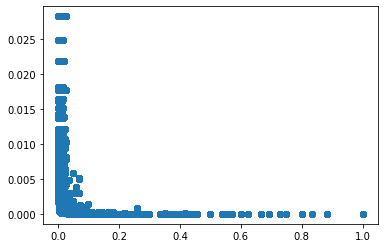

In [51]:
plt.scatter(x= jv.proba_uc_given_ep, y = jv.ep_proba)

In [52]:
jv_= jv[(jv['proba_uc_given_ep'] > 0.5) & ((jv['ep_proba'] < 0.01))]

In [53]:
jv_.endpoint.value_counts()

javascript-i/manipulating                       22
extra-challenges/mysql/mysql-extra-exercises    21
appendix/further-reading/java                   16
spring/form-model-binding                       16
fundamentals/controllers                        15
                                                ..
content/javascript_ii/map-filter-reduce.html     1
115                                              1
content/php_i/intro-to-operators                 1
extra-exercises/j                                1
quic/115                                         1
Name: endpoint, Length: 328, dtype: int64

In [54]:
jv_[jv_.cohort == 'Andromeda'].head(50)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,,
2019-03-19 09:46:34,htmle-css/elements,385,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-19 09:49:30,html,387,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-19 09:49:37,html-css/elecments,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000002,1.000000,1
2019-03-22 11:40:13,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:40:21,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:40:41,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4
2019-03-22 11:41:20,examples/css/..%2f,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000004,1.000000,2
2019-03-22 11:41:27,examples/css/..%2f,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000004,1.000000,2
2019-03-22 11:41:42,examples,373,31.0,97.105.19.58,31,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,2,java,0.000009,0.800000,4


#### Java Program Key Findings:
- It appears that Andromeda contains a large amount of anomalies

### Data Science

In [55]:
ds_cohort_list = list(ds.cohort.value_counts().index)
ds_user_list = list(ds.user_id.value_counts().index)

In [56]:
ds = ds[ds.index <= ds.end_date]
ds = ds[ds.index > ds.start_date]

In [57]:
ep_df = pd.DataFrame(ds.endpoint.value_counts(dropna=False)/ds.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [58]:
ds = ds.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
ds.head()

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program,ep_proba
dt,,,,,,,,,,,,,
2019-08-20 09:39:58,/,466,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:39:59,/,467,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:39:59,/,468,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:40:02,/,469,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239
2019-08-20 09:40:08,/,470,34.0,97.105.19.58,34,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,0.075239


In [59]:
ep_probs = ds.groupby(['endpoint']).size().div(len(ds))

ep_given_user_id_cohort = pd.DataFrame(ds.groupby(['user_id', 'endpoint']).\
                               size().div(len(ds)).\
                               div(ep_probs, 
                                   axis=0, 
                                   level='endpoint').reset_index().rename(index=str, columns={0: 'proba_uc_given_ep'}))

In [60]:
uid_ep_count = pd.DataFrame(ds.groupby(['user_id', 'endpoint'])['cohort_id'].\
                                count().reset_index().\
                                rename(index=str, 
                                       columns={'cohort_id': 'id_ep_count'}))


ep_user = ep_given_user_id_cohort.merge(uid_ep_count)

In [61]:
ds = ds.reset_index().merge(ep_user, on=['user_id', 'endpoint'], how='left').fillna(value=0).set_index('dt')

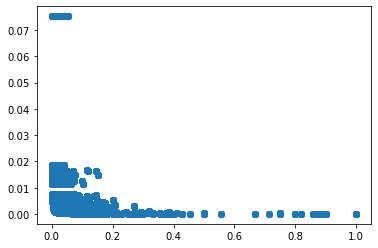

In [62]:
plt.scatter(x= ds.proba_uc_given_ep, y = ds.ep_proba)

In [63]:
df_= ds[(ds['proba_uc_given_ep'] > 0.45) & (ds['ep_proba'] < 0.02)]
df_.user_id.value_counts()

698    70
476    63
484    28
467    22
474    19
949    14
692    14
895    11
907    11
477    10
466    10
694     9
688     8
578     8
911     8
837     8
695     7
581     7
483     7
685     6
580     6
575     6
481     6
472     5
686     5
840     5
696     5
584     4
471     4
617     4
468     4
268     4
582     4
691     4
690     3
590     3
910     3
480     3
841     3
848     3
358     3
478     2
896     2
469     2
699     2
781     2
908     2
845     2
473     1
899     1
475     1
681     1
588     1
780     1
785     1
579     1
576     1
838     1
Name: user_id, dtype: int64

In [64]:
df_[df_.user_id == 698].tail(30)

,endpoint,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program,ep_proba,proba_uc_given_ep,id_ep_count
dt,,,,,,,,,,,,,,,
2020-11-16 12:43:15,explore,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000109,0.800000,8
2020-11-16 12:43:19,prepare,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,1.000000,4
2020-11-16 12:43:21,prepare,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,1.000000,4
2020-11-16 12:43:23,regular-expressions,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000065,1.000000,6
2020-11-19 14:56:30,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-19 14:56:32,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-19 14:56:33,model,698,59.0,67.11.185.59,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000054,1.000000,5
2020-11-20 18:55:07,DataToAction_v2.jpg,698,59.0,67.10.156.23,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000011,1.000000,1
2020-12-08 17:58:34,distributed-ml/read-jdbc,698,59.0,24.28.148.238,59,Darden,#darden,2020-07-13,2021-01-12,2020-07-13 18:32:19,2020-07-13 18:32:19,data_science,0.000044,0.500000,2


In [65]:
df_.endpoint.value_counts()

acquire                             16
html-css                            12
1-fundamentals                       9
3-discrete-probabilistic-methods     9
dataframes                           9
                                    ..
2.1-spreadsheets-overview            1
12-distributed-ml/spark-topics       1
3-vocabulary                         1
Hospital-Distance-Clusters.jpg       1
Index.html                           1
Name: endpoint, Length: 212, dtype: int64

#### Data Science Program Key Findings:
-

### Front End

In [66]:
fep = pd.DataFrame(df[df.program_id == 4])

fep = fep[fep.index <= fep.end_date]
fep = fep[fep.index > fep.start_date]

In [67]:
ep_df = pd.DataFrame(fep.endpoint.value_counts(dropna=False)/fep.endpoint.count()).reset_index().\
                rename(index=str, columns={'index': 'endpoint', 'endpoint': 'ep_proba'})

In [68]:
fep = fep.reset_index().merge(ep_df, on=['endpoint'], how='left').fillna(value=0).set_index('dt')
fep.head()

,user_id,cohort_id,ip,id,cohort,slack,start_date,end_date,created_at,updated_at,program_id,program,endpoint,ep_proba
dt,,,,,,,,,,,,,,


#### Front End Program Key Findings:
- Front end program had no users which index was within start and end date

#### Overall Key Findings & Takeaways:
-Basically the main takeaway was we are able to see anomalies utilizing conditional probabilities, After looking at individuals for various programs I felt comofortable with saying anything with an endpoint count around 70 or less was more than likely a student who wasnt very active. However the closer to one the more likely it was an accident.

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

## 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [28]:
# Reacquire data
df = acquire.get_cohort_curr_data()

In [29]:
# Redo initial_prep
df = prepare.initial_prep(df)

In [30]:
# Question 6 specific prep, before splitting by program
df = explore.q6_prep(df)

In [31]:
# Split into separate DataFrames for each program
df_1, df_2, df_3, df_4 = explore.q6_split(df)

#### Full Stack

In [32]:
# Now let's look at program 1
df_1 = explore.q6_math(df_1)
df_1

,min,max,mean,sum,range,zscore
endpoint,,,,,,
index.html,1,877,126.38,1011,876,10.8338
javascript-i,1,294,66.91,736,293,8.1942
html-css,1,215,49.27,542,214,6.0344
spring,2,222,55.67,501,220,5.4539
java-iii,1,224,53.22,479,223,5.2145
java-i,1,138,40.36,444,137,4.9433
java-ii,1,167,50.44,454,166,4.9423
javascript-ii,2,204,47.67,429,202,4.6701
appendix,1,170,45.44,409,169,4.4525


#### Full Stack Program Key Findings:
- There are 10 lessons, as well as the index, and appendix that grads are continuing to access at a high rate
- It is noteworthy that the level-i lessons tend to be viewed more than their level-i/-ii counterparts

#### Java Program

In [33]:
# Now let's look at program 2
df_2 = explore.q6_math(df_2)
df_2

,min,max,mean,sum,range,zscore
endpoint,,,,,,
javascript-i,6,1817,184.04,4233,1811,13.2490
spring,12,1403,163.96,3771,1391,11.8029
search/search_index.json,1,1349,155.26,3571,1348,11.1770
html-css,3,1284,136.74,3145,1281,9.8436
java-iii,13,1393,133.13,3062,1380,9.5838
java-ii,10,1260,130.00,2990,1250,9.3585
java-i,18,855,116.78,2686,837,8.4070
appendix,9,1288,116.39,2677,1279,8.3788
javascript-ii,9,993,110.96,2552,984,7.9876


#### Java Program Key Findings:
- There are (almost) countless lessons that are being viewed with great frequency after graduation
- Again, the theme of 'basics / fundamentals' is present here
- It is noteworthy that 'java' lessons buck this trend, and the higher levels get accessed more often

#### Data Science Program

In [34]:
# Now let's look at program 3
df_3 = explore.q6_math(df_3)
df_3

,min,max,mean,sum,range,zscore
endpoint,,,,,,
search/search_index.json,149,187,164.33,493,38,8.1461
sql/mysql-overview,27,125,91.67,275,98,4.5439
classification/overview,35,136,89.00,267,101,4.4118
classification/scale_features_or_not.svg,28,96,73.33,220,68,3.6352
anomaly-detection/AnomalyDetectionCartoon.jpeg,14,105,64.33,193,91,3.1891
anomaly-detection/overview,15,104,63.67,191,89,3.1559
fundamentals/AI-ML-DL-timeline.jpg,24,101,63.00,189,77,3.1229
fundamentals/modern-data-scientist.jpg,24,100,62.33,187,76,3.0900
fundamentals/intro-to-data-science,25,96,61.33,184,71,3.0404


#### Data Science Program Key Findings:
- 'basics / fundamentals' again
- Program that utilizes the 'search' feature the most
- SQL is the most accessed lesson

#### Front End Program

In [35]:
# Now let's look at program 4
df_4 = explore.q6_math(df_4)
df_4

,min,max,mean,sum,range,zscore
endpoint,,,,,,


#### Front End Program Key Findings:
- Becasue this program was so short-lived, there is not enough data to find anything meaningful here